<a href="https://colab.research.google.com/github/shrestha-bikash/ai-project/blob/master/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries and the dataset

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from matplotlib.pyplot import figure

url = 'https://raw.githubusercontent.com/shrestha-bikash/ai-project/master/EPLDataset.csv'
df2 = pd.read_csv(url,index_col=0,parse_dates=[0])

print(df2.head())

          away_team  home_goals  away_goals  ...  winner    matchweek     season
home_team                                    ...                                
ARS             AVL           1           1  ...       0  Matchweek 1  2006/2007
BOL             TOT           2           0  ...       1  Matchweek 1  2006/2007
EVE             WAT           2           1  ...       1  Matchweek 1  2006/2007
NEW             WIG           2           1  ...       1  Matchweek 1  2006/2007
POR             BLB           3           0  ...       1  Matchweek 1  2006/2007

[5 rows x 30 columns]


# Import all the required functions and split the datasets

In [11]:

df1 = df2[['home_pos', 'away_pos', 'home_shots_on_target', 'away_shots_on_target', 'home_pass', 'away_pass',
           'home_tackles', 'away_tackles', 'home_corner', 'away_corner', 'home_red', 'away_red', 
           'winner']]

featureLen = df1.shape[1] - 1
total = df1.shape[0]

trainingPart = round(0.6 * total)
validationPart = round(0.3 * total) + trainingPart

# print(trainingPart, validationPart)

# print('Before Shuffling', df1.head())
df1 = df1.sample(frac=1).reset_index(drop=True)
# print('After Shuffling', df1.head())
xdf1 = df1.iloc[:, 0:featureLen]
ydf1 = df1.iloc[:, featureLen:]

xTrain = df1.iloc[:trainingPart, 0:featureLen]
yTrain = df1.iloc[:trainingPart, featureLen:]
xValidation = df1.iloc[trainingPart:validationPart, 0:featureLen]
yValidation = df1.iloc[trainingPart:validationPart, featureLen:]
xTest = df1.iloc[validationPart:, 0:featureLen]
yTest = df1.iloc[validationPart:, featureLen:]

print(xdf1.shape, xTrain.shape, xValidation.shape, xTest.shape)
print('xTrain')
print(xTrain.head())
print('xValidation')
print(xValidation.head())

(4938, 12) (2963, 12) (1481, 12) (494, 12)
xTrain
   home_pos  away_pos  home_shots_on_target  ...  away_corner  home_red  away_red
0      56.0      44.0                     5  ...           12         0         0
1      64.7      35.3                     4  ...            3         0         0
2      57.6      42.4                     3  ...            2         0         0
3      63.8      36.2                     7  ...            0         1         0
4      54.8      45.2                     4  ...            4         0         0

[5 rows x 12 columns]
xValidation
      home_pos  away_pos  home_shots_on_target  ...  away_corner  home_red  away_red
2963      45.5      54.5                     7  ...            7         0         0
2964      67.5      32.5                     7  ...            1         0         0
2965      49.4      50.6                     4  ...            6         0         0
2966      50.2      49.8                     2  ...            5         0         

# Showing histogram for single input feature

In [0]:
plt.hist(xdf1.iloc[:, 0], 20, stacked=True, density=False)
plt.title('Home Posessions')
plt.ylabel('count')
plt.xlabel('home_pos')
plt.show()

# Function to plot all the input features distribution

In [0]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(nGraphShown):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.xlabel(f'{columnNames[i]}')
        plt.title(f'(column {i})')
    plt.tight_layout(pad = 2.0, w_pad = 2.0, h_pad = 1.0)
    plt.show()
    


In [0]:
plotPerColumnDistribution(xTrain, featureLen, 3)

In [0]:
plotPerColumnDistribution(xValidation, featureLen, 5)

# Calculate the mean and standard deviation from the training dataset

In [4]:
mean = xTrain.mean(axis=0)
std = xTrain.std(axis=0)

print('Mean:')
print(mean)
print('Standard Deviation')
print(std)


Mean:
home_pos                 51.609450
away_pos                 48.390550
home_shots_on_target      4.985825
away_shots_on_target      3.881539
home_pass               429.859264
away_pass               404.473844
home_tackles             19.568343
away_tackles             19.997975
home_corner               6.136686
away_corner               4.763078
home_red                  0.055349
away_red                  0.096524
dtype: float64
Standard Deviation
home_pos                 10.549698
away_pos                 10.549698
home_shots_on_target      2.679946
away_shots_on_target      2.238891
home_pass               119.078655
away_pass               112.579393
home_tackles              6.225910
away_tackles              6.282028
home_corner               3.113953
away_corner               2.708284
home_red                  0.235965
away_red                  0.313113
dtype: float64


# Plotting the distribution of output labels

In [0]:
plt.figure(num = None, figsize = (7, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.hist(yTrain.iloc[:, 0])
plt.title('Output label')
plt.ylabel('count')
plt.xlabel('output class')
plt.show()

# Normalize the data

In [5]:
minimum = xTrain.min(axis = 0)
maximum = xTrain.max(axis = 0)
diff = maximum - minimum

# print('Minimum Value')
# print(minimum)
# print('Maximun Value')
# print(maximum)
# print('Difference')
# print(diff)

# xTrain -= minimum
# xTrain /= diff

xTrain -= mean
xTrain /= std

# xValidation -= minimum
# xValidation /= diff

xValidation -= mean
xValidation /= std

# xTest -= minimum
# xTest /= diff

xTest -= mean
xTest /= std

print(xTrain.head())
print(xValidation.head())
print(xTest.head())


   home_pos  away_pos  home_shots_on_target  ...  away_corner  home_red  away_red
0 -0.095685  0.095685              0.751573  ...    -0.650995 -0.234566 -0.308271
1  1.354593 -1.354593             -1.487278  ...     1.195193 -0.234566 -0.308271
2  0.283473 -0.283473             -1.114136  ...     0.825956 -0.234566 -0.308271
3 -0.891916  0.891916              1.497857  ...     0.087481 -0.234566 -0.308271
4  0.074936 -0.074936             -1.114136  ...    -1.020232 -0.234566  2.885461

[5 rows x 12 columns]
      home_pos  away_pos  home_shots_on_target  ...  away_corner  home_red  away_red
2963  0.662630 -0.662630              0.751573  ...     0.087481 -0.234566 -0.308271
2964  2.349882 -2.349882              0.751573  ...    -1.020232 -0.234566 -0.308271
2965 -1.327948  1.327948              0.005289  ...     1.195193 -0.234566 -0.308271
2966 -1.034101  1.034101             -1.487278  ...     0.456718 -0.234566 -0.308271
2967  2.160303 -2.160303              1.497857  ...    -0.65

# Plotting histogram showing the relationships between input and output

In [0]:
trainingDf = df1.iloc[:trainingPart, 0:]

def plotPerColumnRelation(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    groupby_var = 'winner'
    plt.figure(num = None, figsize = (9 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w')
    for i in range(nGraphShown):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        df_agg = df.loc[:, [columnNames[i], groupby_var]].groupby(groupby_var)
        vals = [df[columnNames[i]].values.tolist() for k, df in df_agg]
        colors = [plt.cm.Spectral(j/float(len(vals)-1)) for j in range(len(vals))]

        n, bins, patches = plt.hist(vals, 20, stacked=True, density=False, edgecolor='black', linewidth=1, color=colors[:len(vals)])

        plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
        plt.title(f"Stacked Histogram of '{columnNames[i]}' colored by {groupby_var}", fontsize=18)
        plt.xlabel(columnNames[i])
        plt.ylabel("Frequency")
        plt.xticks( rotation = 90, ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
    
    plt.tight_layout()
    plt.show()

In [0]:
plotPerColumnRelation(trainingDf, featureLen, 2)


# Format the output labels

In [7]:
encoder = LabelBinarizer()
YTrain = encoder.fit_transform(yTrain)
YVal = encoder.fit_transform(yValidation)
YTest = encoder.fit_transform(yTest)

print(YTrain)

[[1 0 0]
 [1 0 0]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [1 0 0]]


# Create and train the Model

In [8]:
def create_network():
  model = Sequential()
  model.add(Dense(12, input_dim=featureLen, activation='relu'))
  model.add(Dense(8, activation='tanh'))
  # model.add(Dense(8, activation='relu'))
  # model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  
  #stochastic gradient descent
  sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

myModal = create_network()
history = myModal.fit(xTrain, YTrain, epochs=150, batch_size=10, validation_data = (xValidation, YVal))

scores = myModal.evaluate(xTrain, YTrain)
print(myModal.metrics_names)
print(scores)
print("Trainning set Accuracy: ", (scores[1] * 100.0) , "%")






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2963 samples, validate on 1481 samples
Epoch 1/150





2963/2963 [==============================] - 2s 509us/step - loss: 1.0564 - acc: 0.4681 - val_loss: 1.0172 - val_acc: 0.4949
Epoch 2/150
2963/2963 [==============================] - 1s 174us/step - loss: 0.9617 - acc: 0.5390 - val_loss: 0.9565 - val_acc: 0.5496
Epoch 3/150
2963/2963 [==============================] - 0s 168us/step - loss: 0.9073 - acc: 0.5717 - val_loss: 0.9172 - val_acc: 0.5780
Epoch 4/150
2963/2963 [==============================] - 0s 167us/step - loss: 0.8806 - acc: 0.5953 - val_loss: 0.9049 - val_acc: 0.5841
Epoch 5/150
2963/2963 [==============================] - 1s 172us/step - loss: 0.8698 - acc: 0.6004 - val_loss: 0.9012 - val_acc: 0.5861
Epoch 6/150
2963/2963 [==============================] - 0s 166us/step - loss: 0.8649 - acc: 0.5964 - val_loss: 0.9025 - val_acc: 0.5739
Epoch 7/150
2963/2963 [

# Plot the learning curve

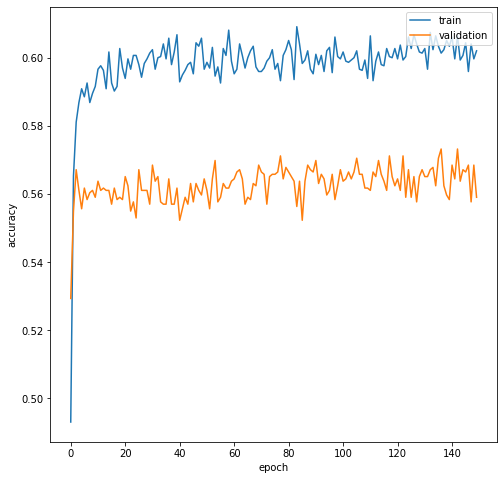

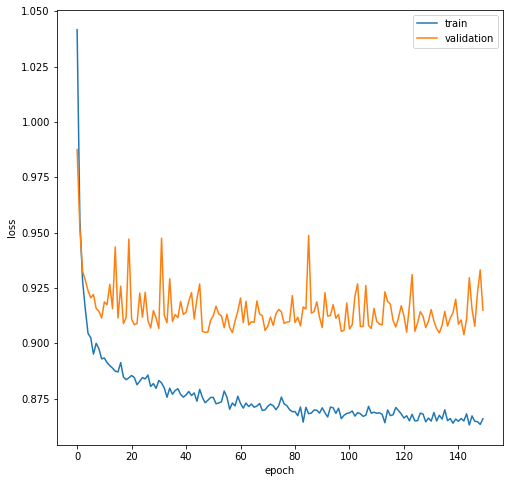

In [0]:
plt.figure(figsize=(8,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Evaluate model on Validation set

In [0]:
# print(xValidation[0:5])
# print(YVal[0:10])

scoresVal = myModal.evaluate(xValidation, YVal)

print(myModal.metrics_names)
print(scoresVal, "\n")
print("Validation set Accuracy: ", (scoresVal[1] * 100.0) , "%")

prediction = myModal.predict(xValidation)

# accuracy = accuracy_score(YVal, prediction.round())
precision = precision_score(YVal, prediction.round(), average='micro')
recall = recall_score(YVal, prediction.round(), average='micro')
f1score = f1_score(YVal, prediction.round(), average='micro')

print("Precision: ", (precision * 100.0))
print("Recall: ", (recall * 100.0))
print("F1-score: ", (f1score))

1481/1481 [==============================] - 0s 25us/step
['loss', 'acc']
[0.9149009710546283, 0.559081701593251] 

Validation set Accuracy:  55.908170159325095 %
Precision:  63.977485928705434
Recall:  46.04996623902768
F1-score:  0.5355319984295248


# Evaluate Model on Training set

In [0]:
scoresValTest = myModal.evaluate(xTest, YTest)
print(myModal.metrics_names)
print(scoresValTest, "\n")
print("Testset Accuracy: ", (scoresValTest[1] * 100.0) , "%")


testPrediction = myModal.predict(xTest)
precision = precision_score(YTest, testPrediction.round(), average='micro')
recall = recall_score(YTest, testPrediction.round(), average='micro')
f1score = f1_score(YTest, testPrediction.round(), average='micro')

print("Precision: ", (precision * 100.0))
print("Recall: ", (recall * 100.0))
print("F1-score: ", (f1score))

494/494 [==============================] - 0s 45us/step
['loss', 'acc']
[0.8579355941610298, 0.6153846155052726] 

Testset Accuracy:  61.53846155052726 %
Precision:  69.2722371967655
Recall:  52.0242914979757
F1-score:  0.5942196531791907


# Custom Prediction Function

In [0]:
# print(myModal.summary())
# input1 = xTrain.iloc[ : 1]

layerLen = len(myModal.layers)
w = []
for i in range(0, layerLen):
  t = myModal.layers[i].get_weights()
  w.append(t)

def sigmoid(X):
  return 1/(1+np.exp(-X))

def relu(X):
  return np.maximum(0,X)

def tanh(X):
  return np.tanh(X)

def softmax(X):
  expo = np.exp(X)
  expo_sum = np.sum(np.exp(X))
  return expo/expo_sum

def custom_predict(input, w):
  layer1 = relu(np.dot(input, w[0][0]) + w[0][1])
  layer2 = tanh(np.dot(layer1, w[1][0]) + w[1][1])
  output = softmax(np.dot(layer2, w[2][0]) + w[2][1])
  return output


# Testing and Comparing custom prediction function on validation set

In [0]:
#comparing first 10 prediction on validation set with keras vs custom function

prediction = myModal.predict(xValidation)
for i in range(1, 11):
  inp = xValidation.iloc[i-1 : i]
  predictVal = custom_predict(inp, w)
  print(predictVal)
  print(prediction[i-1 : i])


[[0.18804371 0.51262939 0.29932689]]
[[0.18804371 0.51262945 0.29932687]]
[[0.19537543 0.09730644 0.70731813]]
[[0.1953754  0.09730637 0.7073182 ]]
[[0.27160618 0.34590381 0.38249001]]
[[0.27160612 0.34590378 0.38249007]]
[[0.41672543 0.23063164 0.35264294]]
[[0.41672534 0.23063174 0.3526429 ]]
[[0.22545131 0.56193237 0.21261632]]
[[0.22545126 0.5619324  0.21261634]]
[[0.17113233 0.0809782  0.74788947]]
[[0.1711323  0.08097817 0.7478895 ]]
[[0.16502367 0.70633245 0.12864387]]
[[0.16502368 0.70633245 0.12864392]]
[[0.12983687 0.7606273  0.10953582]]
[[0.1298369  0.76062715 0.1095359 ]]
[[0.40009899 0.20856164 0.39133937]]
[[0.40009886 0.20856155 0.39133957]]
[[0.29987239 0.39021102 0.30991659]]
[[0.2998724  0.39021105 0.3099166 ]]


# Testing and Comparing custom prediction function on Test set

In [0]:
#comparing first 10 prediction on test set with keras vs custom function

testPrediction = myModal.predict(xTest)
for i in range(1, 11):
  inp = xTest.iloc[i-1 : i]
  predictVal = custom_predict(inp, w)
  print(predictVal)
  print(testPrediction[i-1 : i])

[[0.18823387 0.18162216 0.63014397]]
[[0.18823384 0.18162198 0.6301442 ]]
[[0.27268936 0.08002955 0.64728109]]
[[0.27268937 0.0800295  0.6472811 ]]
[[0.21417978 0.66764913 0.11817109]]
[[0.21417983 0.66764915 0.1181711 ]]
[[0.31936328 0.49819646 0.18244026]]
[[0.31936327 0.4981965  0.1824403 ]]
[[0.21284562 0.6926777  0.09447668]]
[[0.21284561 0.69267774 0.09447669]]
[[0.26365524 0.52577899 0.21056577]]
[[0.26365525 0.5257789  0.21056579]]
[[0.14507838 0.08663671 0.76828491]]
[[0.14507832 0.08663667 0.76828504]]
[[0.18368569 0.62675496 0.18955935]]
[[0.18368569 0.62675494 0.1895594 ]]
[[0.4164846  0.34217412 0.24134128]]
[[0.41648465 0.34217387 0.2413415 ]]
[[0.23409463 0.15007597 0.61582941]]
[[0.23409466 0.15007596 0.6158294 ]]
